<a href="https://colab.research.google.com/github/hemanthkumar17/Probabilistic-Algorithms-Implementations/blob/main/Bloom_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bitarray

In [ ]:
from sklearn.utils import murmurhash3_32
import numpy as np
from bitarray import bitarray
from sklearn.model_selection import train_test_split
import random
import math

In [ ]:
seed = 4

In [ ]:
def hash_factory(m, seed_val):
    return lambda x: murmurhash3_32(x, seed = seed_val) % m

In [ ]:
class BloomFilter:
    def __init__(self, n, fp_rate_expt, optimize=True, test_args=None):
        fpr = lambda k, frac_rn=6: (1 - np.exp(-k / frac_rn))**k
        if optimize:
            k = 0
            frac_rn = 6
            last_rate = 1
            while True:
                rate = fpr(k+1, frac_rn)
                if rate <= fp_rate_expt:
                    break
                else:
                    if rate > last_rate:
                        frac_rn += 1
                        k = 0
                    else:
                        k += 1
                last_rate = rate
        else:
            frac_rn = test_args
            k = math.ceil(0.7 * frac_rn)
            rate = fpr(k, frac_rn)
        self.k = k
        self.frac_rn = frac_rn
        self.m = frac_rn * n
        self.fpr = rate
        print("frac_rn, k, rate")
        print(frac_rn, k, rate)
        self.map = bitarray(self.m)
        self.seed = random.sample(range(1000), self.k)
        self.hashes = [hash_factory(self.m, self.seed[i]) for i in range(self.k)]


    def insert(self, key):
        for h in self.hashes:
            self.map[[h(key)]] = bitarray("1")

    def test(self, key):
        test = bitarray()
        for h in self.hashes:
            test += self.map[[h(key)]]
        return test.count(1) == len(test)

In [ ]:
for fpr in [0.1, 0.01, 0.001, 0.0001]:
    filter = BloomFilter(10000, fpr)

    train, test = train_test_split(random.sample(range(10000, 99999), 11000), test_size=1000)
    for x in train:
        filter.insert(x)
    test += random.sample(train, 1000)
    print("Train: Test", len(train), len(test))
    arr = []
    for t in test:
        arr.append(filter.test(t))
    print("Positive")
    print(sum(arr))
    print("False Positive Rate: ", 1 - 1000 / sum(arr))
    print("*"*50)

frac_rn, k, rate
6 1 0.08035449788501352
Train: Test 10000 2000
Positive
1264
False Positive Rate:  0.2088607594936709
**************************************************
frac_rn, k, rate
10 4 0.009430929226122473
Train: Test 10000 2000
Positive
1061
False Positive Rate:  0.057492931196983954
**************************************************
frac_rn, k, rate
16 5 0.0009350969211338102
Train: Test 10000 2000
Positive
1007
False Positive Rate:  0.006951340615690138
**************************************************
frac_rn, k, rate
20 9 8.894242606813103e-05
Train: Test 10000 2000
Positive
1000
False Positive Rate:  0.0
**************************************************


In [ ]:
!wget https://www.cim.mcgill.ca/~dudek/206/Logs/AOL-user-ct-collection/user-ct-test-collection-01.txt

--2023-09-21 04:03:45--  https://www.cim.mcgill.ca/~dudek/206/Logs/AOL-user-ct-collection/user-ct-test-collection-01.txt
Resolving www.cim.mcgill.ca (www.cim.mcgill.ca)... 132.206.70.20
Connecting to www.cim.mcgill.ca (www.cim.mcgill.ca)|132.206.70.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222762553 (212M) [text/plain]
Saving to: ‘user-ct-test-collection-01.txt.1’

user-ct-test-collec 100%[===================>] 212.44M  27.9MB/s    in 12s     

2023-09-21 04:03:58 (17.6 MB/s) - ‘user-ct-test-collection-01.txt.1’ saved [222762553/222762553]



In [ ]:
import csv
import pandas as pd
data = pd.read_csv("user-ct-test-collection-01.txt", sep="\t")
urllist = data.ClickURL.dropna().unique()

In [ ]:
len(urllist)

377870

In [ ]:
import string
import sys
fpr = []
for frac_rn in range(6, 12):
    filter = BloomFilter(n=len(urllist), fp_rate_expt=0.001, optimize=False, test_args=(frac_rn))

    train = urllist
    test = urllist[np.random.randint(0, len(urllist), 1000)]
    for x in train:
        filter.insert(x)
    for i in range(1000):
        test = np.append(test, ''.join(random.choices(string.ascii_uppercase + string.digits, k=np.random.randint(12, 64))))
    print("Train: Test", len(train), len(test))
    arr = []
    for t in test:
        arr.append(filter.test(t))
    print("Positive")
    print(sum(arr))
    print("False Positive Rate: ", 1 - 1000 / sum(arr))
    print("Bloom filter memory size: ", sys.getsizeof(filter.map))
    print("*"*50)
    fpr.append(1 - 1000 / sum(arr))

frac_rn, k, rate
6 5 0.057781112738492
Train: Test 377870 2000
Positive
1139
False Positive Rate:  0.12203687445127309
Bloom filter memory size:  283483
**************************************************
frac_rn, k, rate
7 5 0.034657842279599324
Train: Test 377870 2000
Positive
1135
False Positive Rate:  0.11894273127753308
Bloom filter memory size:  330717
**************************************************
frac_rn, k, rate
8 6 0.021577141463219263
Train: Test 377870 2000
Positive
1102
False Positive Rate:  0.09255898366606174
Bloom filter memory size:  377950
**************************************************
frac_rn, k, rate
9 7 0.013489227049382223
Train: Test 377870 2000
Positive
1194
False Positive Rate:  0.16247906197654938
Bloom filter memory size:  425184
**************************************************
frac_rn, k, rate
10 7 0.008193722065862417
Train: Test 377870 2000
Positive
1230
False Positive Rate:  0.1869918699186992
Bloom filter memory size:  472418
*******************

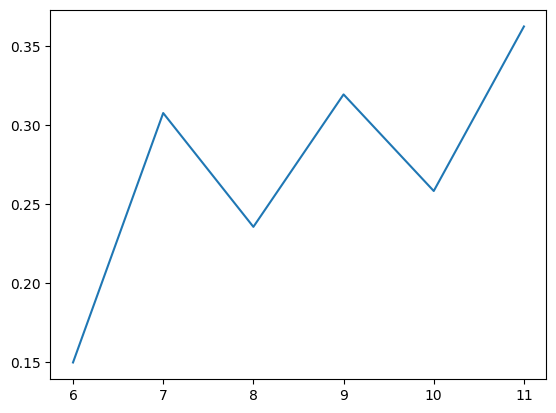

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(6, 12), fpr)

In [ ]:
hashmap = {}
for x in urllist:
    hashmap[x] = True
print("hashmap_memory_size", sys.getsizeof(hashmap))

hashmap_memory_size 20971608


In [ ]:
print("Theoretical size:")
for r in range(6, 12):
    print(r * len(urllist))

Theoretical size:
2267220
2645090
3022960
3400830
3778700
4156570


Bitarray uses slightly more memory than the theoretical value seen for Bloom filters. This is due to several optimizations in place for the language to work better with this class object.
<br>
The python hashtable performs terribly in this problem, requiring much more memoery. This shows that Bloomfilters are much more efficient when theres less memory to use and computation is lenient.
<br>
For the experiments conducted, due to the low number of samples(1000), the fpr does not match the theoretical fpr but does come closer on average if multiple experiments are conducted on the same setting.